# Image Analysis Workflow for BBBC007 Dataset

This notebook contains an image-analysis workflow for processing images and corresponding label images from the BBBC007 dataset. The primary objectives are to develop an image-segmentation workflow, extract features, and analyze and visualize relationships between these features.

The data should be cited as follows: 

> We used image set BBBC007v1 image set version 1 (Jones et al., Proc. ICCV Workshop on Computer Vision for Biomedical Image Applications, 2005), available from the Broad Bioimage Benchmark Collection [Ljosa et al., Nature Methods, 2012].

## Steps to be Covered

1. Setup the software environment
2. Load images and label images
3. Preprocess the images
4. Perform image segmentation to generate label images
5. Extract features from segmented images
6. Visualize relationships between features
7. Identify strongly and weakly correlated features
8. Evaluate the quality of segmentation results
9. Save results to disk (label images and feature CSV files)
10. Document the workflow, used algorithms, and data sources

### Installation Instructions
Ensure you have all necessary libraries installed:
```bash
pip install numpy pandas scikit-image matplotlib seaborn
pip install the_segmentation_game
pip install stackview
```Alternatively, if you are using conda, you can create the environment with:
```bash
conda create --name bioimage_analysis numpy pandas scikit-image matplotlib seaborn stackview
conda activate bioimage_analysis
pip install the_segmentation_game
```


In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops_table
import seaborn as sns
from the_segmentation_game import metrics
import stackview

### Load Images and Label Images
Load images and their corresponding label images from the specified directories.

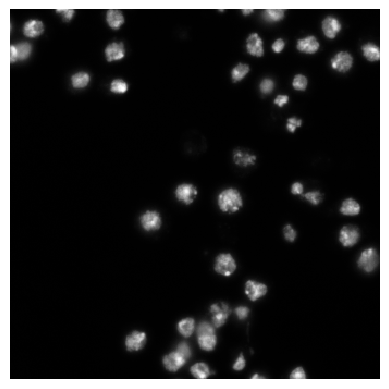

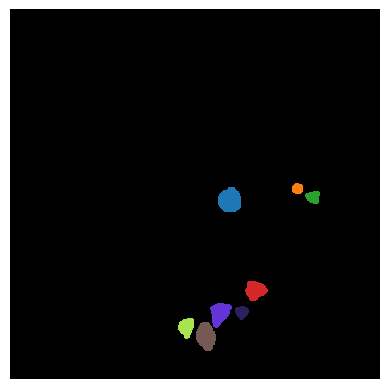

In [2]:
image_folder = '../05b_quality_assurance/data/BBBC007_batch/'
label_folder = '../05b_quality_assurance/data/BBBC007_sparse_instance_annotation/'

image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.tif')])
label_files = sorted([f for f in os.listdir(label_folder) if f.endswith('.tif')])

images = [io.imread(os.path.join(image_folder, f)) for f in image_files]
labels = [io.imread(os.path.join(label_folder, f)) for f in label_files]

# Display example image and its label image
stackview.imshow(images[0])
stackview.imshow(labels[0])

### Preprocess Images
Apply preprocessing steps such as normalization or filtering to improve the segmentation performance.

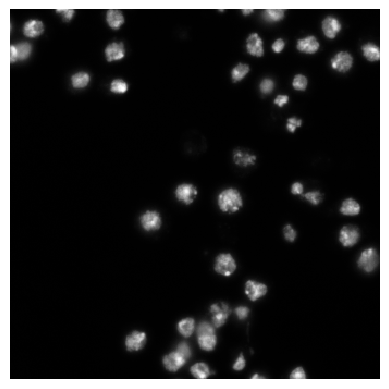

In [3]:
def preprocess_image(image):
    # Normalize image
    return (image - np.min(image)) / (np.max(image) - np.min(image))

preprocessed_images = [preprocess_image(img) for img in images]

# Display preprocessed example image
stackview.imshow(preprocessed_images[0])

### Image Segmentation
Use a basic thresholding method (Otsu's method) to segment the images.

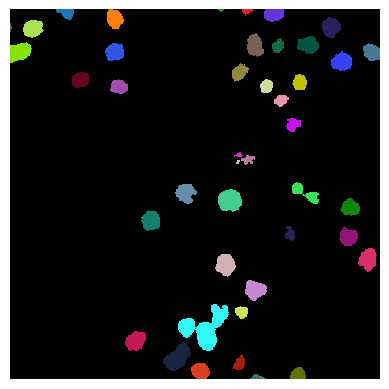

In [4]:
def segment_image(image):
    # Apply Otsu's thresholding
    threshold = threshold_otsu(image)
    binary = image > threshold
    # Label the binary image
    return label(binary)

segmented_images = [segment_image(img) for img in preprocessed_images]

# Display segmented example image
stackview.imshow(segmented_images[0])

### Extract Features
Extract features such as area, mean intensity, etc., from the segmented images.

In [5]:
features_list = []
for img, label_img in zip(preprocessed_images, segmented_images):
    props = regionprops_table(label_img, intensity_image=img, properties=['label', 'area', 'mean_intensity'])
    features_list.append(pd.DataFrame(props))

features_df = pd.concat(features_list, ignore_index=True)

# Display extracted features
display(features_df.head())

,label,area,mean_intensity
0,1,114.0,0.414905
1,2,218.0,0.373510
2,3,11.0,0.281675
3,4,45.0,0.367717
4,5,194.0,0.392747


### Visualize Relationships Between Features
Use a scatter plot matrix to visualize the relationships between features.

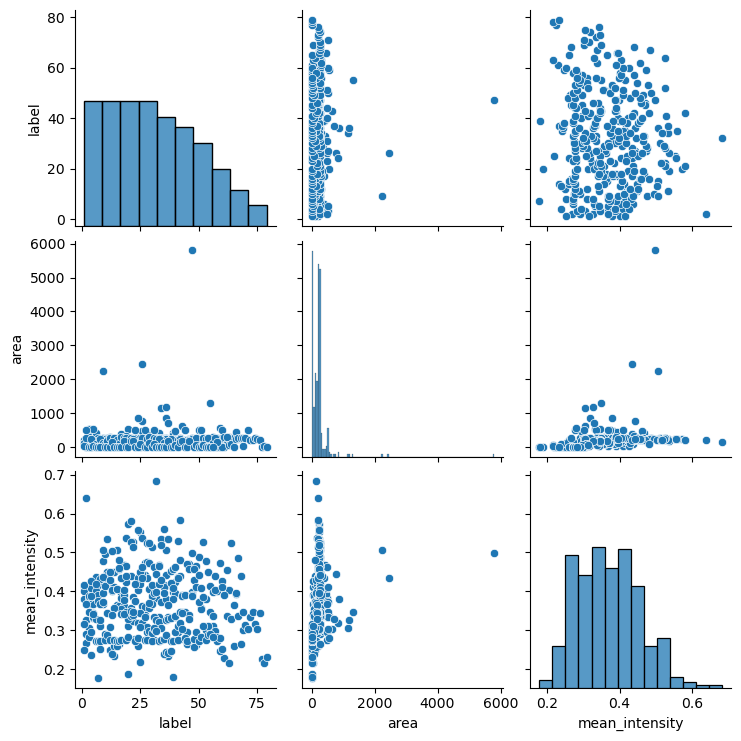

In [6]:
sns.pairplot(features_df)
plt.show()

### Correlation Analysis
Find out which features are strongly correlated and which are not.

In [7]:
correlation_matrix = features_df.corr()
display(correlation_matrix)

,label,area,mean_intensity
label,1.000000,0.046879,-0.093263
area,0.046879,1.000000,0.245208
mean_intensity,-0.093263,0.245208,1.000000


### Evaluate Segmentation Quality
Using the sparse Jaccard index to evaluate the quality of the segmentation results against the provided label images.

In [8]:
jaccard_indices = [metrics.jaccard_index_sparse(ref, seg) for ref, seg in zip(labels, segmented_images)]
print(f'Average Jaccard Index: {np.mean(jaccard_indices)}')

Average Jaccard Index: 0.5315719465106079


### Save Results
Save the segmentation results (label images) and the extracted features to disk.

In [9]:
output_label_folder = './segmentation_results/'
output_feature_file = './extracted_features.csv'

os.makedirs(output_label_folder, exist_ok=True)
for i, seg_img in enumerate(segmented_images):
    io.imsave(os.path.join(output_label_folder, image_files[i]), seg_img.astype(np.uint16))

features_df.to_csv(output_feature_file, index=False)

print(f'Segmentation results saved to: {output_label_folder}')
print(f'Extracted features saved to: {output_feature_file}')

Segmentation results saved to: ./segmentation_results/
Extracted features saved to: ./extracted_features.csv


C:\Users\haase\AppData\Local\Temp\ipykernel_7368\217873321.py:6: UserWarning: ./segmentation_results/17P1_POS0013_D_1UL.tif is a low contrast image
  io.imsave(os.path.join(output_label_folder, image_files[i]), seg_img.astype(np.uint16))
C:\Users\haase\AppData\Local\Temp\ipykernel_7368\217873321.py:6: UserWarning: ./segmentation_results/20P1_POS0005_D_1UL.tif is a low contrast image
  io.imsave(os.path.join(output_label_folder, image_files[i]), seg_img.astype(np.uint16))
C:\Users\haase\AppData\Local\Temp\ipykernel_7368\217873321.py:6: UserWarning: ./segmentation_results/20P1_POS0007_D_1UL.tif is a low contrast image
  io.imsave(os.path.join(output_label_folder, image_files[i]), seg_img.astype(np.uint16))
C:\Users\haase\AppData\Local\Temp\ipykernel_7368\217873321.py:6: UserWarning: ./segmentation_results/20P1_POS0010_D_1UL.tif is a low contrast image
  io.imsave(os.path.join(output_label_folder, image_files[i]), seg_img.astype(np.uint16))
C:\Users\haase\AppData\Local\Temp\ipykernel_7368

## Documentation

### User Guide
1. Place your images and corresponding label images in the specified folders.
2. Run the notebook cells to process the images, extract features, and visualize results.
3. Refer to the output messages for the locations of saved results.

### Documentation of Used Data
We used image set BBBC007v1 image set version 1 (Jones et al., Proc. ICCV Workshop on Computer Vision for Biomedical Image Applications, 2005), available from the Broad Bioimage Benchmark Collection [Ljosa et al., Nature Methods, 2012].

### Explanation of the Used Algorithms
1. **Otsu Thresholding**: A global thresholding method that automatically determines the threshold to separate foreground and background by minimizing intra-class variance.
2. **Region Properties Extraction**: Using `regionprops_table` from `skimage.measure` to calculate properties like area and mean intensity for labeled regions in the image.
3. **Sparse Jaccard Index**: Measures the similarity between the ground truth and predicted segmentation by comparing the intersection and union of labeled pixels.